In [45]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [46]:
df_Taxi_EDA= pd.read_csv('Taxis_Fuel_Cleaned.csv')

In [47]:
# Se procede a ver la informacion del dataframe
df_Taxi_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6573 entries, 0 to 6572
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              6573 non-null   int64  
 1   Year                    6573 non-null   int64  
 2   Manufacturer            6573 non-null   object 
 3   Model                   6573 non-null   object 
 4   CO2 (p/mile)            6573 non-null   float64
 5   Miles per gallon (mpg)  6573 non-null   float64
 6   ef_x_comb               6573 non-null   float64
 7   comb_x_year             6573 non-null   float64
 8   Fuel                    6573 non-null   object 
 9   score_ghg               6573 non-null   float64
 10  ef_x_comb_city          6564 non-null   float64
 11  youSaveSpend            6564 non-null   float64
 12  Alternative Fuel        6573 non-null   object 
 13  createdOn               6542 non-null   object 
 14  modifiedOn              6542 non-null   

In [48]:
# Se elimina la columna unnamed: 0
df_Taxi_EDA.drop("Unnamed: 0", axis=1, inplace=True)

In [49]:
df_Taxi_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6573 entries, 0 to 6572
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    6573 non-null   int64  
 1   Manufacturer            6573 non-null   object 
 2   Model                   6573 non-null   object 
 3   CO2 (p/mile)            6573 non-null   float64
 4   Miles per gallon (mpg)  6573 non-null   float64
 5   ef_x_comb               6573 non-null   float64
 6   comb_x_year             6573 non-null   float64
 7   Fuel                    6573 non-null   object 
 8   score_ghg               6573 non-null   float64
 9   ef_x_comb_city          6564 non-null   float64
 10  youSaveSpend            6564 non-null   float64
 11  Alternative Fuel        6573 non-null   object 
 12  createdOn               6542 non-null   object 
 13  modifiedOn              6542 non-null   object 
dtypes: float64(7), int64(1), object(6)
memor

In [50]:
# Se imprimen estadísticas resumidas de las columnas numéricas. 
print(df_Taxi_EDA.describe())

          Year      CO2 (p/mile)  Miles per gallon (mpg)   ef_x_comb   \
count  6573.000000   6573.000000        6573.000000       6573.000000   
mean   2021.046250    382.122623          27.115625          4.899437   
std       1.468265    136.597089          18.234800          1.995069   
min    2019.000000      0.000000           9.000000          1.000000   
25%    2020.000000    324.000000          19.000000          4.000000   
50%    2021.000000    390.000000          23.000000          5.000000   
75%    2022.000000    465.000000          27.000000          6.000000   
max    2024.000000    979.000000         142.000000         10.000000   

       comb_x_year   score_ghg   ef_x_comb_city  youSaveSpend  
count  6573.000000  6573.000000    6564.000000    6564.000000  
mean   2647.999391     4.923931      32.880334   -3642.862584  
std     897.767756     2.051081      28.478823    4532.140425  
min     500.000000     1.000000       9.300000  -26750.000000  
25%    2100.000000    

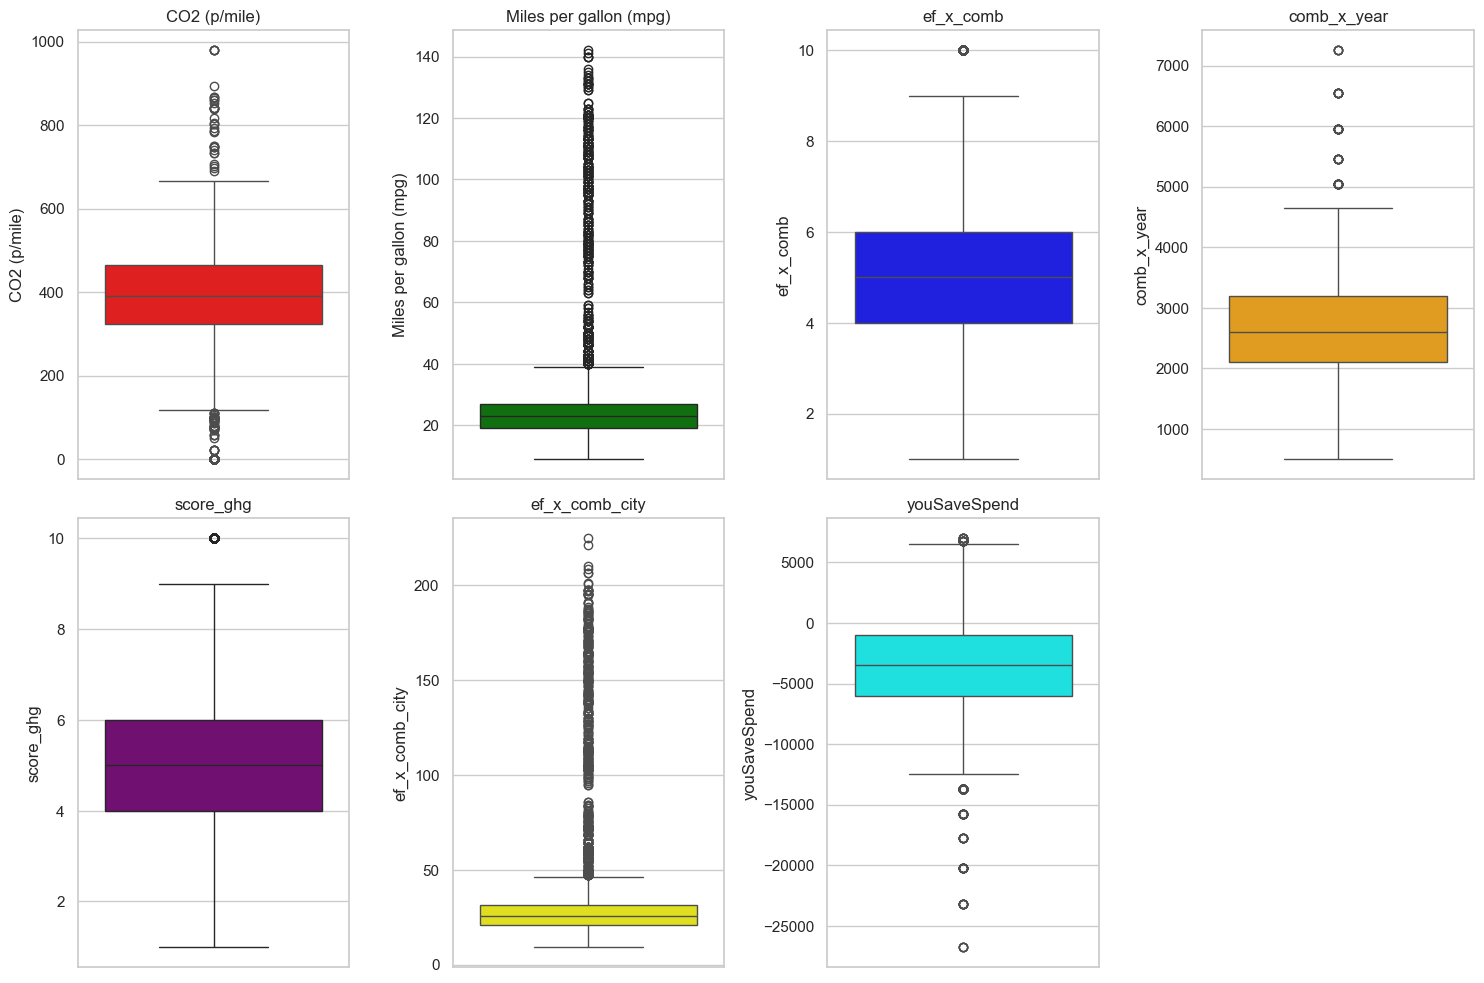

In [51]:
# Se grafican outliers
columnas = ['CO2 (p/mile)', 'Miles per gallon (mpg)', 'ef_x_comb', 'comb_x_year', 'score_ghg', 'ef_x_comb_city', 'youSaveSpend']
	

colores = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'cyan', 'magenta']

plt.figure(figsize=(15, 10))

for i, column in enumerate(columnas):
    plt.subplot(2, 4, i+1)  
    sns.boxplot(y=df_Taxi_EDA[column], color=colores[i])
    plt.title(column)

plt.tight_layout()
plt.show()

In [52]:
df_Taxi_EDA[df_Taxi_EDA['CO2 (p/mile)'] > 900]

,Year,Manufacturer,Model,CO2 (p/mile),Miles per gallon (mpg),ef_x_comb,comb_x_year,Fuel,score_ghg,ef_x_comb_city,youSaveSpend,Alternative Fuel,createdOn,modifiedOn
896,2022,Bugatti,Chiron Pur Sport,979.0,9.0,1.0,7250.0,Premium Gasoline,1.0,9.3,-26750.0,No,24-09-2021,10-05-2022
2508,2023,Bugatti,Chiron Super Sport,979.0,9.0,1.0,7250.0,Premium Gasoline,1.0,9.3,-26750.0,No,20-09-2022,20-09-2022
3537,2022,Bugatti,Chiron Super Sport,979.0,9.0,1.0,7250.0,Premium Gasoline,1.0,9.3,-26750.0,No,24-09-2021,04-10-2021
5074,2023,Bugatti,Chiron Pur Sport,979.0,9.0,1.0,7250.0,Premium Gasoline,1.0,9.3,-26750.0,No,20-09-2022,20-09-2022


In [55]:
df_Taxi_EDA[df_Taxi_EDA['CO2 (p/mile)'] < 100].head(5)

,Year,Manufacturer,Model,CO2 (p/mile),Miles per gallon (mpg),ef_x_comb,comb_x_year,Fuel,score_ghg,ef_x_comb_city,youSaveSpend,Alternative Fuel,createdOn,modifiedOn
93,2019,Hyundai,Ioniq Electric,0.0,136.0,10.0,500.0,Electricity,10.0,224.8000,7000.0,No,12-07-2018,02-02-2022
183,2019,Ford,Fusion Energi Plug-in Hybrid,99.0,42.0,10.0,1250.0,Regular Gasoline,10.0,60.4000,4750.0,Electricity,21-09-2018,25-03-2022
184,2019,Nissan,Leaf (40 kW-hr battery pack),0.0,112.0,10.0,650.0,Electricity,10.0,177.3165,6250.0,No,21-09-2018,02-04-2020
193,2019,Kia,Niro Plug-in Hybrid,90.0,46.0,10.0,1150.0,Regular Gasoline,10.0,63.9000,5000.0,Electricity,03-10-2018,25-03-2022
205,2019,Chevrolet,Volt,51.0,42.0,10.0,1250.0,Regular Gasoline,10.0,58.8000,5500.0,Electricity,17-10-2018,25-03-2022


In [69]:
df_Taxi_EDA[df_Taxi_EDA['Miles per gallon (mpg)'] > 100].head()

,Year,Manufacturer,Model,CO2 (p/mile),Miles per gallon (mpg),ef_x_comb,comb_x_year,Fuel,score_ghg,ef_x_comb_city,youSaveSpend,Alternative Fuel,createdOn,modifiedOn
93,2019,Hyundai,Ioniq Electric,0.0,136.0,10.0,500.0,Electricity,10.0,224.8000,7000.0,No,12-07-2018,02-02-2022
184,2019,Nissan,Leaf (40 kW-hr battery pack),0.0,112.0,10.0,650.0,Electricity,10.0,177.3165,6250.0,No,21-09-2018,02-04-2020
230,2019,BMW,i3s,0.0,113.0,10.0,650.0,Electricity,10.0,177.7000,6250.0,No,19-11-2018,02-02-2022
246,2019,Fiat,500e,0.0,112.0,10.0,650.0,Electricity,10.0,172.9000,6250.0,No,18-12-2018,02-02-2022
256,2019,smart,EQ fortwo (convertible),0.0,102.0,10.0,700.0,Electricity,10.0,165.1000,6000.0,No,29-01-2019,02-02-2022


In [61]:
df_Taxi_EDA[df_Taxi_EDA['ef_x_comb_city'] > 180].head()

,Year,Manufacturer,Model,CO2 (p/mile),Miles per gallon (mpg),ef_x_comb,comb_x_year,Fuel,score_ghg,ef_x_comb_city,youSaveSpend,Alternative Fuel,createdOn,modifiedOn
93,2019,Hyundai,Ioniq Electric,0.0,136.0,10.0,500.0,Electricity,10.0,224.8,7000.0,No,12-07-2018,02-02-2022
301,2019,Tesla,Model 3 Standard Range Plus,0.0,133.0,10.0,550.0,Electricity,10.0,200.6,6750.0,No,02-05-2019,02-02-2022
465,2020,Chevrolet,Bolt EV,0.0,118.0,10.0,600.0,Electricity,10.0,181.7,6500.0,No,16-10-2019,02-02-2022
482,2020,Hyundai,Ioniq Electric,0.0,133.0,10.0,550.0,Electricity,10.0,206.6,6750.0,No,05-11-2019,02-02-2022
484,2020,Tesla,Model 3 Long Range Performance AWD (18in),0.0,121.0,10.0,600.0,Electricity,10.0,182.7,6500.0,No,05-11-2019,02-02-2022


In [65]:
df_Taxi_EDA[df_Taxi_EDA['youSaveSpend'] < -15000].head()

,Year,Manufacturer,Model,CO2 (p/mile),Miles per gallon (mpg),ef_x_comb,comb_x_year,Fuel,score_ghg,ef_x_comb_city,youSaveSpend,Alternative Fuel,createdOn,modifiedOn
123,2019,Lamborghini,Aventador Coupe,784.0,11.0,1.0,5950.0,Premium Gasoline,1.0,10.7497,-20250.0,No,10-08-2018,10-08-2018
204,2019,Jeep,Grand Cherokee Trackhawk 4WD,664.0,13.0,1.0,5050.0,Premium Gasoline,1.0,13.7000,-15750.0,No,17-10-2018,18-12-2018
469,2020,Bugatti,Chiron,840.0,11.0,1.0,5950.0,Premium Gasoline,1.0,10.4000,-20250.0,No,05-11-2019,14-04-2020
882,2022,Ram,1500 TRX 4WD,748.0,12.0,1.0,5450.0,Premium Gasoline,1.0,12.7000,-17750.0,No,17-08-2021,24-02-2022
896,2022,Bugatti,Chiron Pur Sport,979.0,9.0,1.0,7250.0,Premium Gasoline,1.0,9.3000,-26750.0,No,24-09-2021,10-05-2022


## ANILISIS DE OUTLIERS
Los datos sugieren que los autos eléctricos e híbridos exhiben una mayor eficiencia en términos de menores emisiones de CO2, más millas por galón, mejor eficacia de combustión en entornos urbanos y un mayor ahorro en combustible. Por otro lado, los outliers que muestran mayores emisiones de CO2, menor eficiencia de combustión en la ciudad y mayor gasto en combustible parecen asociarse principalmente con vehículos de alta gama no eléctricos. Este patrón podría explicarse por las características de rendimiento de los automóviles de lujo, que a menudo sacrifican eficiencia por potencia y prestaciones.

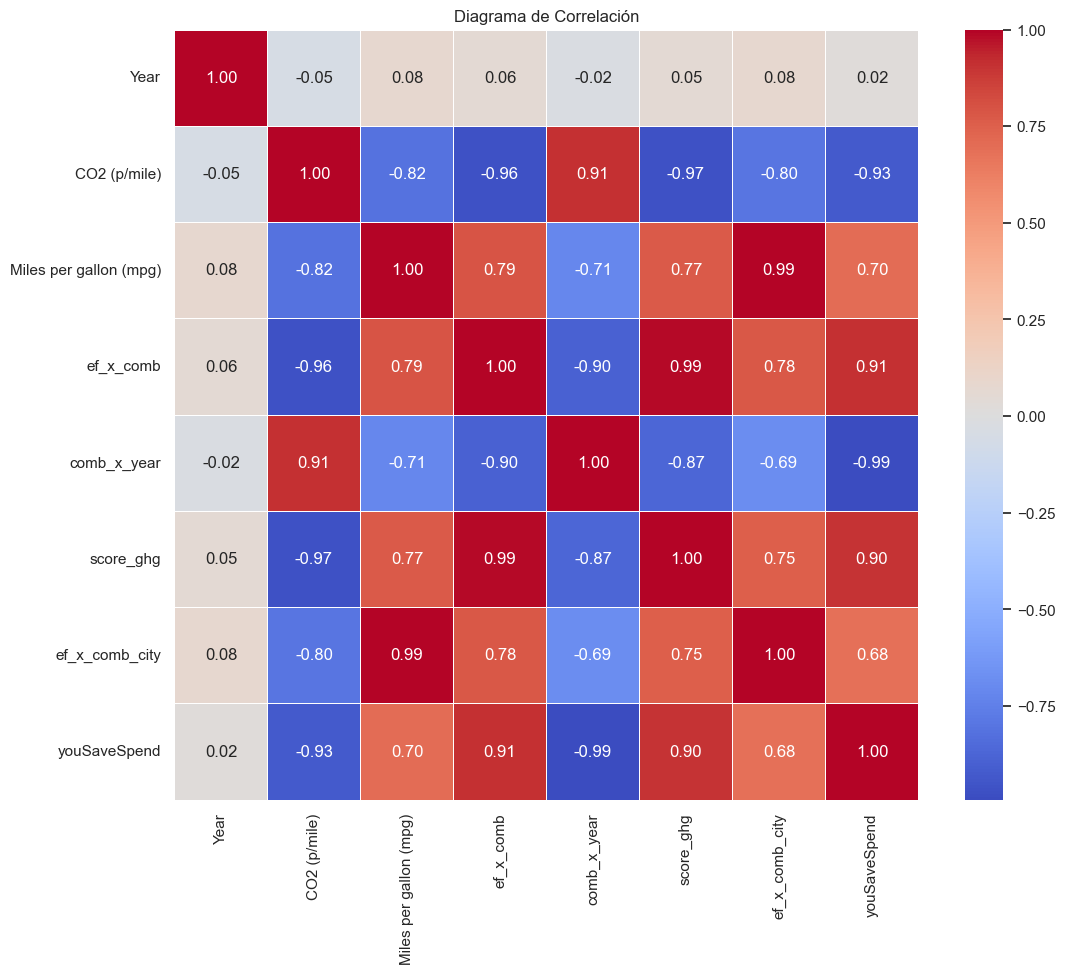

In [71]:
# Se filtra solo las columnas numéricas
taxis_numeric = df_Taxi_EDA.select_dtypes(include=['number'])

# Se calcula la matriz de correlación
correlation_matrix = taxis_numeric.corr()

# Se crea el mapa de calor con colores atractivos
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Diagrama de Correlación")
plt.show()

## INSIGHTS

- Los autos electricos no emiten Co2.
- score_ghg almacena la puntuación de emisiones de gases de efecto invernadero (GHG) de un  vehículo, que está relacionada con sus emisiones de gases perjudiciales para el medio ambiente. De igual manera, el score sube a medida que baja la cantidad de co2 producido.
- La columna 'Miles per gallon (mpg)' representan el consumo de combustible en millas. Claramente relacionado en el grafico con la eficiencia del vehiculo en consumo de combustible('ef_x_comb').
- El ahorro de o gasto de combustible (youSaveSpend) esta altamente relacionado con la eficiencia de combustible.

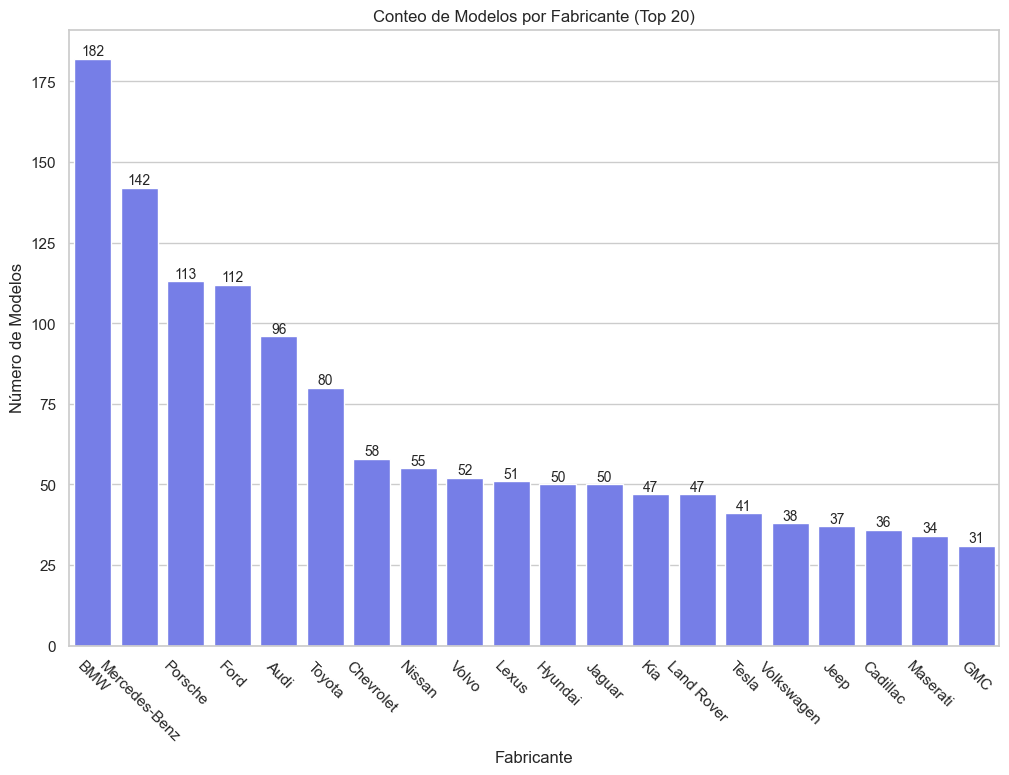

In [80]:
# Se calcula el conteo de modelos por fabricante
model_count_by_manufacturer = df_Taxi_EDA.groupby('Manufacturer')['Model'].nunique().sort_values(ascending=False)

# Se filtra el top 20
top_20_manufacturers = model_count_by_manufacturer.head(20)

# Se configura el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Se crea el gráfico con Seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_20_manufacturers.index,
                 y=top_20_manufacturers.values,
                 color='#636EFA')  # Color similar al original de Plotly Express

# Se añade etiquetas sobre las columnas
for index, value in enumerate(top_20_manufacturers):
    ax.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

# Se configura el diseño del gráfico
plt.title('Conteo de Modelos por Fabricante (Top 20)')
plt.xlabel('Fabricante')
plt.ylabel('Número de Modelos')
plt.xticks(rotation=-45)
plt.show()

Podemos observar en el grafico anterior, que la marca BMW es la marca que mas modelos de autos disponibles con un total de 182.

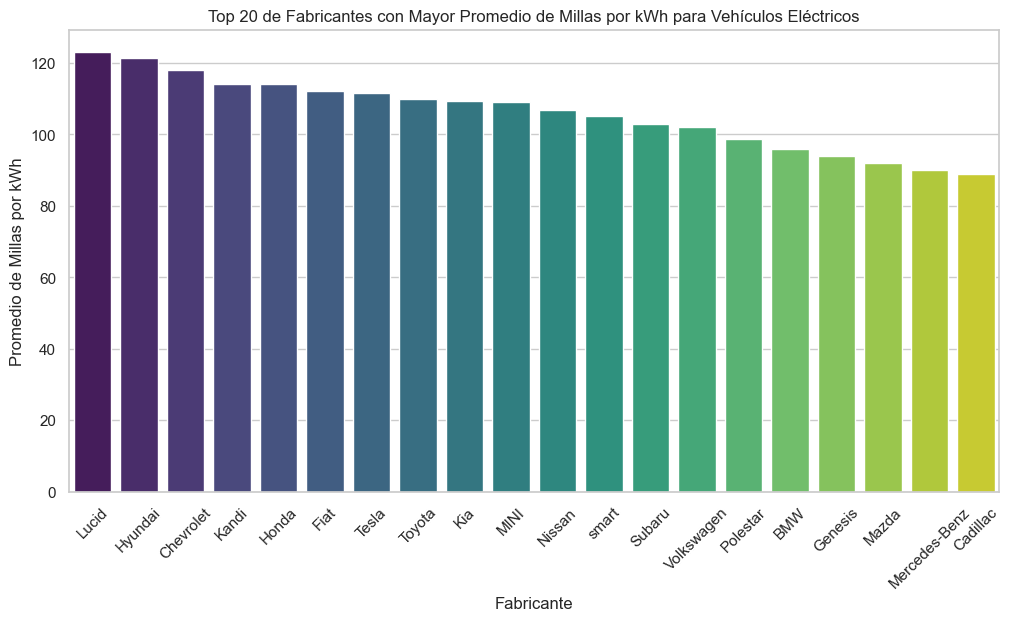

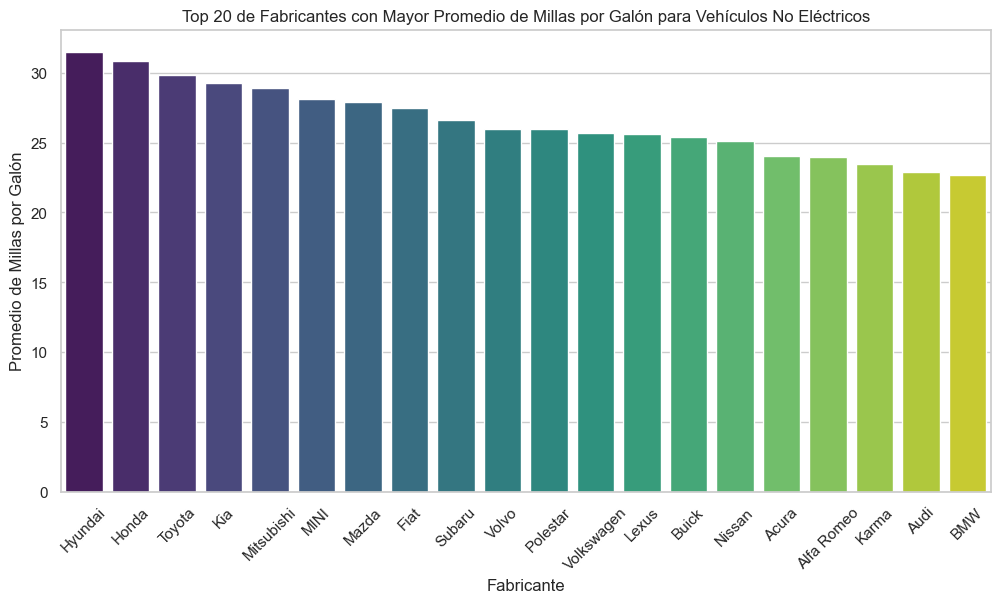

In [118]:

# Se filtra datos para vehículos eléctricos
electric_vehicles = df_Taxi_EDA[df_Taxi_EDA['Fuel'] == 'Electricity']
electric_data = electric_vehicles[['Manufacturer', 'Miles per gallon (mpg)']]

# Se calcula el promedio de millas por kWh por fabricante para vehículos eléctricos
average_mpkWh_electric = electric_data.groupby('Manufacturer')['Miles per gallon (mpg)'].mean().reset_index()

# Se ordena los fabricantes por promedio de millas por kWh de mayor a menor
sorted_manufacturers_electric = average_mpkWh_electric.sort_values(by='Miles per gallon (mpg)', ascending=False)

# Se toma el top 20 para vehículos eléctricos
top_20_electric = sorted_manufacturers_electric.head(20)

# Se configura el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Se crea el gráfico de barras para vehículos eléctricos con ejes invertidos
plt.figure(figsize=(12, 6))
sns.barplot(x='Manufacturer', y='Miles per gallon (mpg)', data=top_20_electric, palette='viridis')
plt.title('Top 20 de Fabricantes con Mayor Promedio de Millas por kWh para Vehículos Eléctricos')
plt.xlabel('Fabricante')
plt.ylabel('Promedio de Millas por kWh')
plt.xticks(rotation=45) 
plt.show()

# Se iltra datos para vehículos no eléctricos
non_electric_vehicles = df_Taxi_EDA[df_Taxi_EDA['Fuel'] != 'Electricity']
non_electric_data = non_electric_vehicles[['Manufacturer', 'Miles per gallon (mpg)']]

# Se calcula el promedio de millas por galón por fabricante para vehículos no eléctricos
average_mpg_non_electric = non_electric_data.groupby('Manufacturer')['Miles per gallon (mpg)'].mean().reset_index()

# Se ordena los fabricantes por promedio de millas por galón de mayor a menor
sorted_manufacturers_non_electric = average_mpg_non_electric.sort_values(by='Miles per gallon (mpg)', ascending=False)

# Se toma el top 20 para vehículos no eléctricos
top_20_non_electric = sorted_manufacturers_non_electric.head(20)

# Se crea el gráfico de barras para vehículos no eléctricos con ejes invertidos
plt.figure(figsize=(12, 6))
sns.barplot(x='Manufacturer', y='Miles per gallon (mpg)', data=top_20_non_electric, palette='viridis')
plt.title('Top 20 de Fabricantes con Mayor Promedio de Millas por Galón para Vehículos No Eléctricos')
plt.xlabel('Fabricante')
plt.ylabel('Promedio de Millas por Galón')
plt.xticks(rotation=45)  
plt.show()

Para vehículos eléctricos, Lucid está mejor optimizado con un promedio de 125 millas por kWh mientras que el ranking de autonomía en vehículos con motor a combustión es liderado por Hyundai con aproximadamente un promedio de 30 millas por galón.